# Facial Emotion Classification

### Importing Necessary Libraries

In [1]:
!pip install wget

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
import wget

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

### Importing the Dataset

In [4]:
url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Bhavyaaa/FE_2.zip"
file = wget.download(url)

In [5]:
import zipfile
data = zipfile.ZipFile(file,"r")
data.extractall("FE (2)")

#data.printdir()

In [6]:
image = image.load_img("FE (2)/FE/Train/Happy/1.jpg")

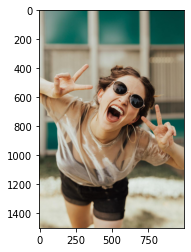

In [7]:
plt.imshow(image)

In [8]:
cv2.imread("FE (2)/FE/Train/Happy/1.jpg").shape

(1500, 1000, 3)

### Preprocessing Steps

In [9]:
img_width,img_height = 256,256
train_data_dir = "FE (2)/FE/Train/"
validation_data_dir = "FE (2)/FE/Validation/"
batch_size = 20

In [10]:
if K.image_data_format() == 'channels_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

In [11]:
train= ImageDataGenerator(rescale = 1./255 , featurewise_center = False, shear_range = 0.2,
                        featurewise_std_normalization = False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255 )

In [12]:
train_dataset = train.flow_from_directory(train_data_dir,target_size = (256,256),batch_size = 10,class_mode = "binary") 
validation_dataset = validation.flow_from_directory(validation_data_dir,target_size = (256,256),batch_size = 5,class_mode = "binary")

Found 83 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [13]:
train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [14]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Model 

In [49]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape = (256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512,activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
activation_12 (Activation)   (None, 254, 254, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
activation_13 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)       

In [51]:
model.compile(loss = "binary_crossentropy",optimizer ='rmsprop',metrics = ['accuracy'])

In [52]:
model_fit = model.fit_generator(train_dataset,steps_per_epoch = 9,epochs = 50,validation_data = validation_dataset)

Epoch 1/50
9/9 [==============================] - 1s 112ms/step - loss: 3.2621 - accuracy: 0.5422 - val_loss: 0.6828 - val_accuracy: 0.5366
Epoch 2/50
9/9 [==============================] - 1s 109ms/step - loss: 0.6969 - accuracy: 0.5663 - val_loss: 0.7055 - val_accuracy: 0.4878
Epoch 3/50
9/9 [==============================] - 1s 108ms/step - loss: 0.7280 - accuracy: 0.5060 - val_loss: 0.6593 - val_accuracy: 0.6829
Epoch 4/50
9/9 [==============================] - 1s 109ms/step - loss: 0.9139 - accuracy: 0.6627 - val_loss: 0.7090 - val_accuracy: 0.5854
Epoch 5/50
9/9 [==============================] - 1s 108ms/step - loss: 0.6920 - accuracy: 0.5783 - val_loss: 0.6400 - val_accuracy: 0.7073
Epoch 6/50
9/9 [==============================] - 1s 110ms/step - loss: 0.6581 - accuracy: 0.6627 - val_loss: 0.6508 - val_accuracy: 0.5854
Epoch 7/50
9/9 [==============================] - 1s 107ms/step - loss: 0.6031 - accuracy: 0.6024 - val_loss: 0.6400 - val_accuracy: 0.6585
Epoch 8/50
9/9 [====

In [20]:
model.save('final_model.h5')

In [21]:
model = load_model('final_model.h5')

### Analysis

accuracy at epoch 1: 0.5421686768531799
accuracy at epoch 50 0.8072289228439331
validation accuracy at epoch 1: 0.5365853905677795
validation accuracy at epoch 50: 0.6341463327407837


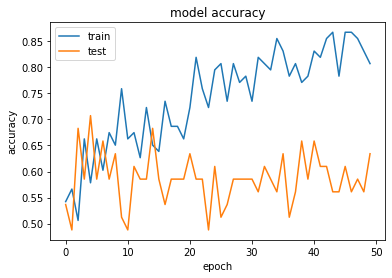

In [53]:
print("accuracy at epoch 1:",model_fit.history["accuracy"][0])
print("accuracy at epoch 50",model_fit.history["accuracy"][49])
print("validation accuracy at epoch 1:",model_fit.history["val_accuracy"][0])
print("validation accuracy at epoch 50:",model_fit.history["val_accuracy"][49])
plt.plot(model_fit.history["accuracy"])
plt.plot(model_fit.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

loss at epoch 1: 3.262063980102539
loss at epoch 50: 0.3647790849208832
validation loss at epoch 1: 3.262063980102539
validation loss at epoch 50: 0.3647790849208832


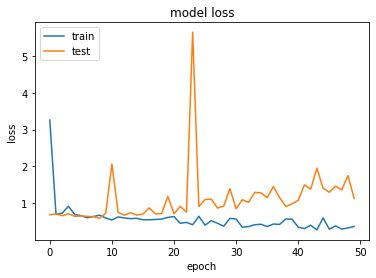

In [54]:
print(f"loss at epoch 1: {model_fit.history['loss'][0]}")
print(f"loss at epoch 50: {model_fit.history['loss'][49]}")
print(f"validation loss at epoch 1: {model_fit.history['loss'][0]}")
print(f"validation loss at epoch 50: {model_fit.history['loss'][49]}")
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prediction

In [55]:
test_url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Bhavyaaa/Test_FE.zip"
test_file = wget.download(test_url)

In [56]:
data2 = zipfile.ZipFile(test_file,"r")
data2.extractall("Test FE")

In [57]:
from tensorflow.keras.preprocessing import image

#### For Single Image

In [58]:
img_pred = image.load_img("Test FE/Test FE/converted-1.jpg",target_size = (256,256))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis = 0)

In [59]:
result = model.predict(img_pred)
print(result)
if result[0][0] == 1:
    print("Sad")
else:
    print("Happy")

[[0.]]
Happy


#### For Multiple Images

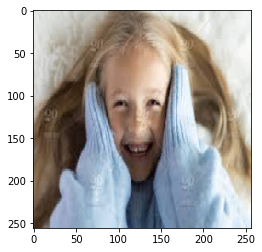

[[0.]]
Happy


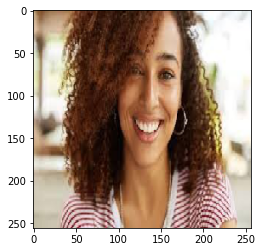

[[0.]]
Happy


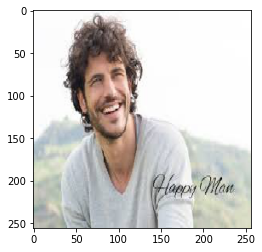

[[1.2090687e-14]]
Happy


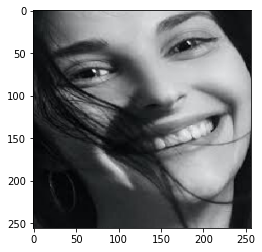

[[0.]]
Happy


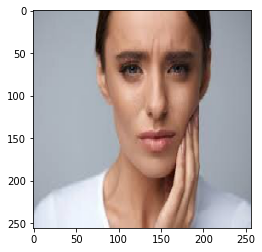

[[1.]]
Sad


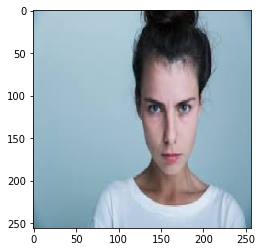

[[0.]]
Happy


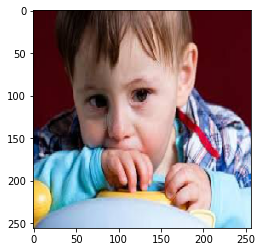

[[1.]]
Sad


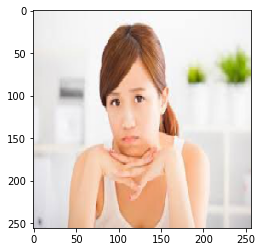

[[1.]]
Sad


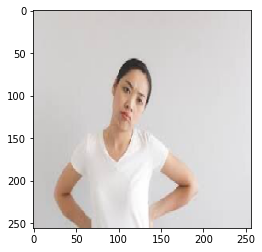

[[6.299677e-18]]
Happy


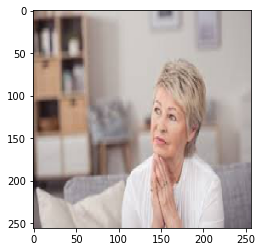

[[0.]]
Happy


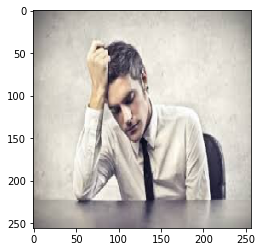

[[2.0037552e-14]]
Happy


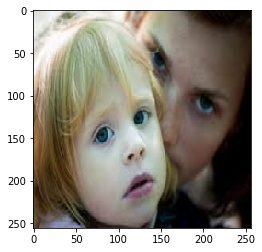

[[0.]]
Happy


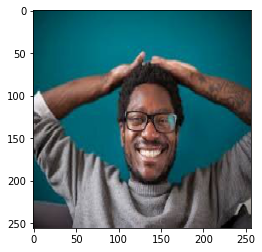

[[0.]]
Happy


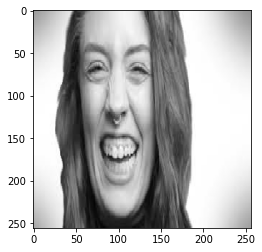

[[9.9734944e-29]]
Happy


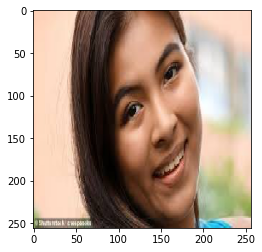

[[1.]]
Sad


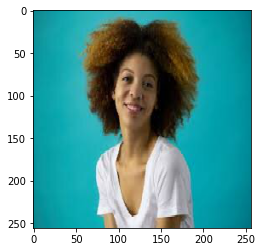

[[0.]]
Happy


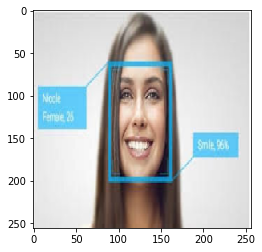

[[0.]]
Happy


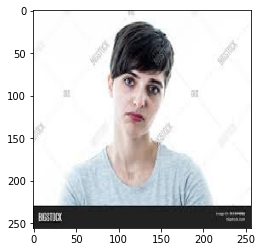

[[0.]]
Happy


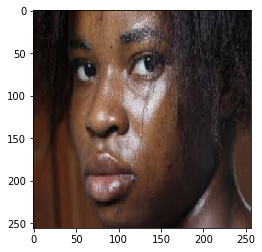

[[0.]]
Happy


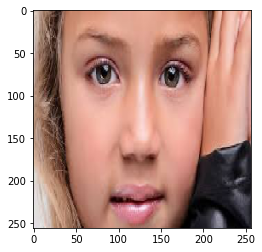

[[1.]]
Sad


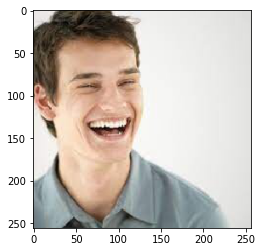

[[0.]]
Happy


In [60]:
import os
directory = "Test FE/Test FE"

for i in range(1,len(os.listdir(directory))):
    dir_path = "Test FE/Test FE/converted-{}.jpg".format(i)
    img_pred = image.load_img(dir_path,target_size = (256,256))
    plt.imshow(img_pred)
    plt.show()
    img_pred = image.img_to_array(img_pred)
    img_pred = np.expand_dims(img_pred,axis = 0)
    result = model.predict(img_pred)
    print(result)
    if result[0][0] == 1:
        print("Sad")
    else:
        print("Happy")